<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
# Загрузим данные
data = pd.read_csv('/datasets/insurance.csv')
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


Значения столбцов "Возраст" и "Зарплата" много больше значений столбцов других признаков, поэтому их необходимо отмасштабировать. 

In [3]:
# Разделим датасет на таблицу с признаками и целевым признаком
features = data.drop(columns=['Страховые выплаты'])
target = data['Страховые выплаты']
# Отмасшатбиреум признаки
scaler = StandardScaler()
scaler.fit(features.loc[:,['Возраст', 'Зарплата']])
features[['Возраст', 'Зарплата']] = scaler.transform(features[['Возраст', 'Зарплата']])
# Посмотрим на обновленную таблицу
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,1.190432,0.978235,1
1,0,1.782851,-0.193589,1
2,0,-0.231375,-1.910918,0
3,0,-1.179247,0.180182,2
4,1,-0.349859,-1.395720,0
...,...,...,...,...
4995,0,-0.349859,-0.425934,2
4996,0,0.361044,1.261089,1
4997,0,-1.297731,-0.607769,2
4998,1,-1.060763,-0.728992,3


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Я считаю, что при умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится. При этом стоит помнить, что обратимая матрица должна быть квадратной с размерностью *n* x *n*, где *n* - количество признаков.

**Обоснование:** 
Умножим признаки *X* на обратимую матрицу *P* размером *n* x *n*, где *n* - количество признаков и запишем выражение для матрицы коэффициентов линейно регрессии:

$$
w_{new} = [(X P)^T  X P]^{-1} (X P)^T y
$$

Раскроем скобки и приведем подобные члены, используя некоторые правила перемножения матриц:

$$
w_{new} = [(X P)^T  X P]^{-1} (X P)^T y = [P^T X^T X P]^{-1} P^T X^T y =  P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y =  P^{-1} (X^T X)^{-1} [(P^T)^{-1} P^T] X^T y =  P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$
В итоге получаем:
$$
w_{new} = P^{-1} w
$$
Обновленные предсказания:
$$
a_{new} = X P w_{new} = X P P^{-1} w = X w = a
$$

Таким образом, при умножении матрицы признаков на обратимую матрицу и обучении модели мы получаем те же самые предсказания.

## Алгоритм преобразования

**Алгоритм**

1. Создадим квадратную матрицу *P* размером *n* x *n*, где *n* - количество признаков, со случайными значениями
2. Провери, что существует обратная ей матрица.
3. Умножим датасет с признаками размером *m* x *n* (где *m* - количество объектов) на созданную матрицу и получаем новую матрицу признаков, которая также имеет размер  *m* x *n*.

К приемуществам токого алгоритма можно отнести то, что достаточно легко восстановить исходные значения признаков, зная обратимую матрицу. Для восстановления исходных значений достаточно домножить новую матрицу признаков на матрицу обратную созданной.
Также этот алгоритм использует все строки и столбцы исходной таблицы, не теряя информации.

Матрица с новыми значениями признаков:

$$
X_{new} = X P
$$

Домножим матрицу на обратную матрицу $P^{-1}$ и преобразуем выражение:

$$
X_{new} P^{-1} = X P P^{-1} = X (P P^{-1}) = X E = X
$$

В итоге мы получаем исходную матрицу признаков X.

**Обоснование**

Качество линейной регрессии не поменяется, так как мы заменили значения элементов матрицы признаков, сохранив размерность. При этом, значение каждого элемента новой матрицы признаков является линейной комбинацей исходных значений признаков, что означает высокую корреляцию значений элементов этих двух матриц.  

## Проверка алгоритма

In [4]:
# Обучим модель со стандартной матрицей признаков
model = LinearRegression()
model.fit(features, target)
pred = model.predict(features)
r2 = r2_score(target, pred)
print(f"Значение коэффициента R2 до обработки признаков: {r2:.6f}")
# Сохраним коэффициенты модели
coefs_1 = model.coef_

# Изменим матрицу признаков и заново обучим модель 
# # Зафиксируем случайность
# np.random.seed(12345) 

# Созадим матрицу со случайными значениями и проверим, что она обратима
i = 0
while i == 0:
    try:
        matrix = np.random.randint(100, size = (features.shape[1], features.shape[1]))
        i = 1
        print('Создана обратимая матрица:')
        print(matrix)
    except:
        print('Возникла ошибка, матрица необратима. Пробуем еще раз.')

# Преобразуем матрицу признаков и обучим модель
features_transformed = features @ matrix
features_transformed.columns = features.columns
model.fit(features_transformed, target)
pred = model.predict(features_transformed)
r2_transformed = r2_score(target, pred)
print(f"Значение коэффициента R2 после обработки признаков: {r2_transformed:.6f}")
# Сохраним коэффициенты модели
coefs_2 = model.coef_

Значение коэффициента R2 до обработки признаков: 0.424946
Создана обратимая матрица:
[[23 56 81 54]
 [71 92 10 92]
 [12 43 70 33]
 [84 69 63  6]]
Значение коэффициента R2 после обработки признаков: 0.424946


**Выводы:** Алгоритм преобразования признаков не оказал влияния на эффективность модели. Значение метрики R2 не изменилось и осталось на уровне 0,42.

Восстановим исходные значения признаков

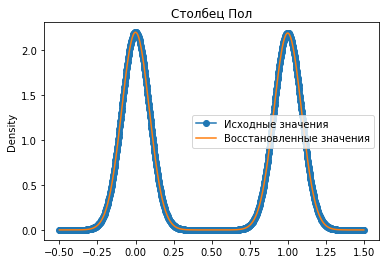

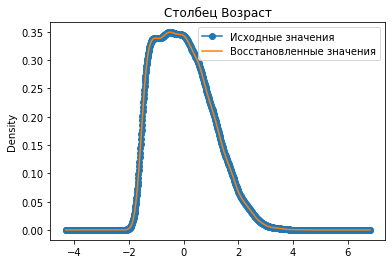

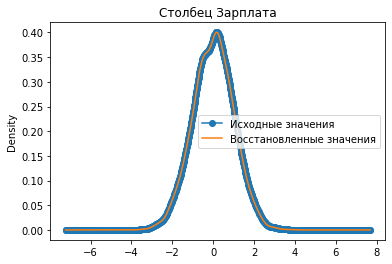

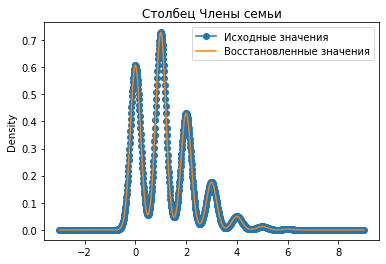

In [5]:
# Найдем обратную матрицу
inv_matrix = np.linalg.inv(matrix)
features_restored = features_transformed @ inv_matrix
features_restored.columns = features.columns
# Сравним распределения исходных и восстановленных значений
for col in features.columns:
    features[col].plot.kde(marker='o', label="Исходные значения")
    features_restored[col].plot.kde(label="Восстановленные значения")
    plt.title("Столбец " +str(col))
    plt.legend()
    plt.show()

**Вывод:** По распределениям видно, что восстановление исходных значений работает корректно.

Посмотрим как связаны коэффициенты моделей до и после преобразования

In [6]:
print("Коэффициенты модели до преобразования")
print(coefs_1)
print("Коэффициенты модели после преобразования")
print(coefs_2)
# Проверим формулу из пункта 2. Выразим коэффиценты новой модели через коээфиценты модели до преобразования и посмотрим на разность
print("Расчитанные значения коэффициентов:")
print(inv_matrix.dot(coefs_1))

Коэффициенты модели до преобразования
[ 0.00792581  0.30137677 -0.00168364 -0.01356766]
Коэффициенты модели после преобразования
[-0.00260206  0.00576857 -0.00304932 -0.00015318]
Расчитанные значения коэффициентов:
[-0.00260206  0.00576857 -0.00304932 -0.00015318]


**Выводы:** Формула работает, расчитанные значения близки к полученным

## Выводы

В данном проекты показано, что умножение матрицы признаков на обратимую матрицу не влияет на обучаемость модели линейной регрессии и на значение метрики качества.

Был разработан алгоритм кодирования признаков. Приведенный алгоритм позволяет, зная нужную матрицу преобразования, вычислить исходные значения признаков. 

Были проверены формулы связывающе параметры линейно регрессии до и после преобразования.